In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


**IMPORT DATA**

In [3]:
data=pd.read_csv('./train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


****Try and visulalize this data****

In [4]:
data['Ticket_type']=data['Ticket'].apply(lambda x: x[0:3])
data['Ticket_type']=data['Ticket_type'].astype('category').cat.codes # convert catogorical data into int 

In [5]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,124
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,137
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,148


In [6]:
data['Words_counts']=data['Name'].apply(lambda x: len(x.split())) # counting no. of words in a name

In [7]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_type,Words_counts
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,124,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,137,7
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,148,3


In [8]:
data['cabin_or_not']=data["Cabin"].apply(lambda x: 0 if type(x) == float else 1)  # passenger has a cabin or not 
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_type,Words_counts,cabin_or_not
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,124,4,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,137,7,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,148,3,0


**Survival rate of passengers having cabin or not**

<AxesSubplot:>

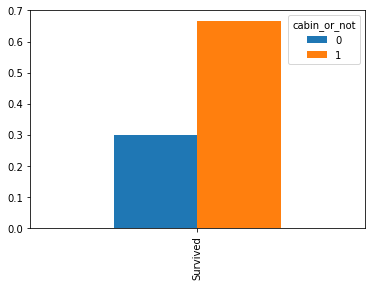

In [9]:
pd.pivot_table(data,values='Survived',columns='cabin_or_not').plot.bar()

In [10]:
data['Family_size']=data['SibSp'] + data['Parch'] + 1  # find family size and make a saperate column

In [11]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_type,Words_counts,cabin_or_not,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,124,4,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,137,7,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,148,3,0,1


<AxesSubplot:>

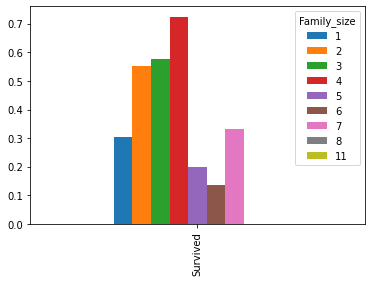

In [12]:
pd.pivot_table(data,values='Survived',columns='Family_size').plot.bar()

In [13]:
data['IsAlone'] = 0
data.loc[data['Family_size'] == 1, 'IsAlone'] = 1 # is a passenger is with family or not
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_type,Words_counts,cabin_or_not,Family_size,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,124,4,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,137,7,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,148,3,0,1,1


<AxesSubplot:>

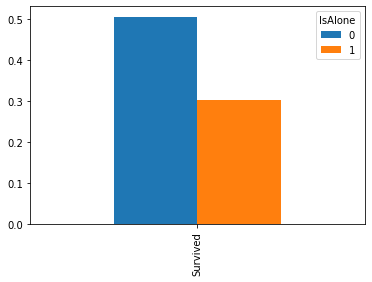

In [14]:
pd.pivot_table(data,values='Survived',columns='IsAlone').plot.bar()

In [15]:
data['Embarked'] = data['Embarked'].fillna('S')   #Fill na 
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [16]:
data['fare_cat']=pd.qcut(data['Fare'], 4) #dividing fare into catogories
data['fare_cat']=data['fare_cat'].astype('category').cat.codes.astype('int')

**Fare VS Survival plot**

<AxesSubplot:>

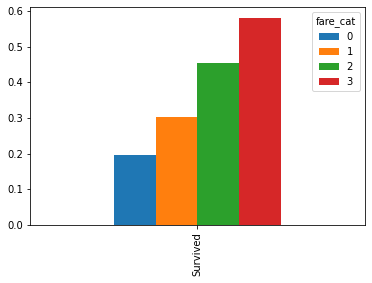

In [17]:
pd.pivot_table(data,values='Survived',columns='fare_cat').plot.bar()

In [18]:
data['cat_age']=pd.cut(data['Age'],5)   #Dividing age into 5 catogories
print(data['cat_age'].value_counts())
data['cat_age']=data['cat_age'].astype('category').cat.codes.astype('int')

(16.336, 32.252]    523
(32.252, 48.168]    188
(0.34, 16.336]      100
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: cat_age, dtype: int64


**Age vs Survival plot**

<AxesSubplot:>

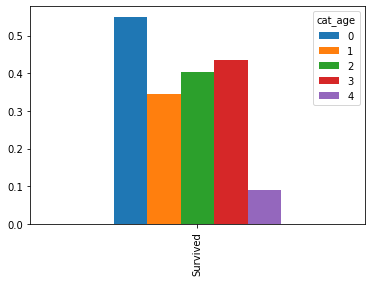

In [19]:
pd.pivot_table(data,values='Survived',columns='cat_age').plot.bar()
#Childrens has the highest rate of survival and elders has lowest

In [20]:
# collecting titles from their names
import re
title=[]
for i in range(0,891):
    title.append(re.search(' ([A-Za-z]+)\.', data['Name'][i]).group(1))
title=pd.Series(title)
title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Jonkheer      1
Ms            1
Mme           1
Don           1
Lady          1
Capt          1
Countess      1
Sir           1
dtype: int64

In [21]:
title=title.replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],'Rare')
title=title.replace('Mlle','Miss')
title=title.replace('Ms','Miss')
title=title.replace('Mme','Mrs')
title.value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
dtype: int64

Replacing  Text with integers

In [22]:
data['Title']=title
dic1= {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
data['Title'] = data['Title'].map(dic1)
data['Title'] =data['Title'].fillna(0)

<AxesSubplot:>

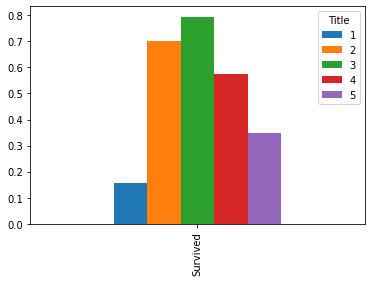

In [23]:
pd.pivot_table(data,values='Survived',columns='Title').plot.bar()
#survival rate Title wise
#you can see that Mrs has the highest rate of survival and Mr has lowest

In [24]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_type,Words_counts,cabin_or_not,Family_size,IsAlone,fare_cat,cat_age,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,124,4,0,2,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,137,7,1,2,0,3,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,148,3,0,1,1,1,1,2


In [25]:
data['Sex'] = data['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_type,Words_counts,cabin_or_not,Family_size,IsAlone,fare_cat,cat_age,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,124,4,0,2,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,137,7,1,2,0,3,2,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,148,3,0,1,1,1,1,2


<AxesSubplot:>

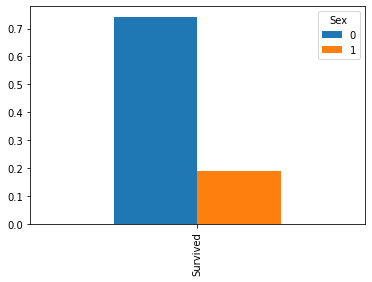

In [26]:
pd.pivot_table(data,values='Survived',columns='Sex').plot.bar()
#female has the highest rate of survival

In [27]:
data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

<AxesSubplot:>

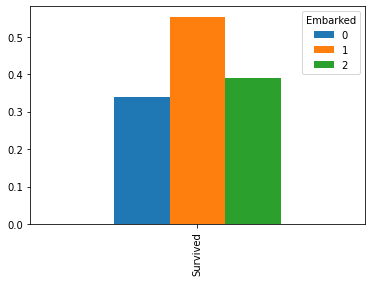

In [28]:
pd.pivot_table(data,values='Survived',columns='Embarked').plot.bar()
#survival rate vs Embarked

In [29]:
data.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [30]:
data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_type,Words_counts,cabin_or_not,Family_size,IsAlone,fare_cat,cat_age,Title
0,0,3,1,22.0,1,0,7.2500,0,124,4,0,2,0,0,1,1
1,1,1,0,38.0,1,0,71.2833,1,137,7,1,2,0,3,2,3
2,1,3,0,26.0,0,0,7.9250,0,148,3,0,1,1,1,1,2


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Sex           891 non-null    int32  
 3   Age           891 non-null    float64
 4   SibSp         891 non-null    int64  
 5   Parch         891 non-null    int64  
 6   Fare          891 non-null    float64
 7   Embarked      891 non-null    int32  
 8   Ticket_type   891 non-null    int16  
 9   Words_counts  891 non-null    int64  
 10  cabin_or_not  891 non-null    int64  
 11  Family_size   891 non-null    int64  
 12  IsAlone       891 non-null    int64  
 13  fare_cat      891 non-null    int32  
 14  cat_age       891 non-null    int32  
 15  Title         891 non-null    int64  
dtypes: float64(2), int16(1), int32(4), int64(9)
memory usage: 92.4 KB


**data is ready**

**Just make the above blocks of code into one block and apply it on both test and train data**

In [34]:
train=pd.read_csv('./train.csv')
test=pd.read_csv('./test.csv')

In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [36]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [37]:
datas=[train,test]
for data in datas:
    data['Ticket_type']=data['Ticket'].apply(lambda x: x[0:3])
    data['Ticket_type']=data['Ticket_type'].astype('category').cat.codes
    data['Words_counts']=data['Name'].apply(lambda x: len(x.split()))
    data['cabin_or_not']=data["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
    data['Family_size']=data['SibSp'] + data['Parch'] + 1
    data['IsAlone'] = 0
    data.loc[data['Family_size'] == 1, 'IsAlone'] = 1
    data['Embarked'] = data['Embarked'].fillna('S')
    data['fare_cat']=pd.qcut(data['Fare'], 4)
    data['Age'].fillna(data['Age'].mean(),inplace=True)
    data['cat_age']=pd.cut(data['Age'],5)
    title=[]
    for i in range(0,len(data)):
        title.append(re.search(' ([A-Za-z]+)\.', data['Name'][i]).group(1))
    title=pd.Series(title)
    title=title.replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],'Rare')
    title=title.replace('Mlle','Miss')
    title=title.replace('Ms','Miss')
    title=title.replace('Mme','Mrs')
    data['Title']=title
    data['Sex'] = data['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    dic1= {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    data['Title'] = data['Title'].map(dic1)
    data['Title'] =data['Title'].fillna(0)
    data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype('int')
    data['fare_cat']=data['fare_cat'].astype('category').cat.codes.astype('int')
    data['cat_age']=data['cat_age'].astype('category').cat.codes.astype('int')
    data.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)
    

In [38]:
train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_type,Words_counts,cabin_or_not,Family_size,IsAlone,fare_cat,cat_age,Title
0,0,3,1,22.0,1,0,7.2500,0,124,4,0,2,0,0,1,1
1,1,1,0,38.0,1,0,71.2833,1,137,7,1,2,0,3,2,3
2,1,3,0,26.0,0,0,7.9250,0,148,3,0,1,1,1,1,2


In [39]:
x=train.drop(columns=['Survived'])
y=train['Survived']

**LogisticRegression MODEL**

In [40]:
log_model = LogisticRegression(C=22).fit(x, y)

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Submitting our output**

In [41]:
submitssion_dis={'PassengerId':[a for a in range(892,1310)]
                 ,'Survived':log_model.predict(test) }

In [42]:
submission=pd.DataFrame(submitssion_dis)
submission.to_csv('Submission_out.csv',index=False)